请运用所学知识，在二维纵向平面内，建立直线弹道拦截抛物线运动目标模型，并求解命中问题，要求。

1. 请列出目标抛物线运动方程具体表达式，目标发射射速v0=300m/s,射角0=30degree.(可自行设定v0,0)
2. 武器直线弹道飞行速度vw=600m/s，武器目标相对初始位置可自己设定。
3. 编写并附上主要程序代码（推荐使用MatLab）。
4. 合理选择一组参数进行数值仿真计算，给出相关仿真曲线和计算数据。


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

基本的思路是把原点设在射击原点，然后另外某个地方发射目标，它那速度和射角给定后得到的曲线自然是个抛物线。加个原点位移就可以得到那些曲线。
当然曲线本身没什么用，因为我们要恰好在某个时间与其相交，这引出两个方法，第一我们可以确定我们的发射角定出的曲线于其的交点（如果有）
对应的t是不是一样的，不是一样的就无解，这个事情可以直接写到方程里。

$$
\begin{aligned}
y &= 600\sin(\theta)t-\frac{1}{2}gt^2 \\
x &= 600\cos(\theta)t \\
y &= 300\sin(\pi/6)t - \frac{1}{2}gt^2 + y_0 \\
x &= -300\cos(\pi/6)t + x_0
\end{aligned}
$$

看上去复杂，然而联立起来看比较简单。

$$
\begin{align*}
300\sin(\pi/6)t - \frac{1}{2}gt^2 + y_0 &= 600\sin(\theta)t-\frac{1}{2}gt^2 \\
-300\cos(\pi/6)t + x_0 &= 600\cos(\theta)t \\
\end{align*}
$$

化简

$$
\begin{align*}
300\sin(\pi/6)t + y_0 &= 600\sin(\theta)t \\
-300\cos(\pi/6)t + x_0 &= 600\cos(\theta)t \\
\end{align*}
$$

求比

$$
\frac{300\sin(\pi/6)t + y_0}{-300\cos(\pi/6)t + x_0} = \frac{600\sin(\theta)t}{600\cos(\theta)t}=\tan(\theta) 
$$

从而

$$
\theta = \arctan\left( \frac{300\sin(\pi/6)t + y_0}{-300\cos(\pi/6)t + x_0} \right)
$$

这个$t$可以代进$\frac{x_0}{300\cos(\pi/6)+600\cos(\theta)}$之类的，当然结果看起来像是个超越方程，考虑其有没有解之类的边缘条件
也比较复杂，很难想象它怎么会有简单的解析解。

In [4]:
from scipy.optimize import root

In [8]:
x0=1000.0
y0=0.0

def func(p):
    t, theta = p
    return [300*np.sin(np.pi/6)*t+y0 - 600*np.sin(theta)*t,
            -300*np.cos(np.pi/6)*t+x0- 600*np.cos(theta)*t]

res=root(func, [1.0,1.0])
res

    fjac: array([[ 0.00900053, -0.99995949],
       [ 0.99995949,  0.00900053]])
     fun: array([ 1.74225079e-11, -9.09494702e-12])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.93056913e-08, -3.57432911e-08])
       r: array([ 844.82298966, -183.53063474, -687.33393932])
  status: 1
 success: True
       x: array([1.18940697, 0.25268026])

In [9]:
func(res.x)

[1.7422507880837657e-11, -9.094947017729282e-12]

In [20]:
t, theta = res.x
t,theta

(1.1894069659103053, 0.2526802551420534)

In [11]:
300*np.sin(np.pi/6)*t+y0,600*np.sin(theta)*t

(178.41104488654577, 178.41104488652834)

In [12]:
-300*np.cos(np.pi/6)*t+x0,600*np.cos(theta)*t

(690.9830056250512, 690.9830056250603)

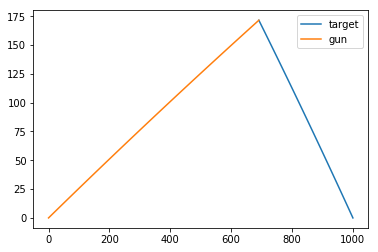

In [23]:
T = np.linspace(0,t*1,100)
g = 9.8
plt.plot(-300*np.cos(np.pi/6)*T+x0,300*np.sin(np.pi/6)*T-0.5*g*T**2+y0,label="target")
plt.plot(600*np.cos(theta)*T, 600*np.sin(theta)*T-0.5*g*T**2,label='gun')
plt.legend()

In [24]:
x0=10000.0
y0=0.0

def func(p):
    t, theta = p
    return [300*np.sin(np.pi/6)*t+y0 - 600*np.sin(theta)*t,
            -300*np.cos(np.pi/6)*t+x0- 600*np.cos(theta)*t]

res=root(func, [1.0,1.0])
res

    fjac: array([[ 0.07150759, -0.99744006],
       [ 0.99744006,  0.07150759]])
     fun: array([4.31055014e-09, 2.51020538e-09])
 message: 'The solution converged.'
    nfev: 26
     qtf: array([ 2.10093561e-06, -4.26899933e-06])
       r: array([  809.11885685, -2073.15307951, -7173.39283336])
  status: 1
 success: True
       x: array([11.89406966,  0.25268026])

In [25]:
t, theta = res.x
t,theta

(11.894069659098687, 0.25268025514145476)

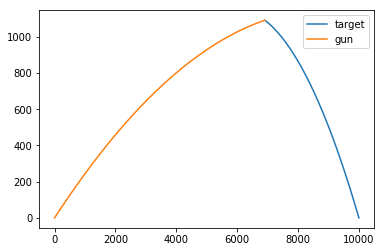

In [26]:
T = np.linspace(0,t*1,100)
g = 9.8
plt.plot(-300*np.cos(np.pi/6)*T+x0,300*np.sin(np.pi/6)*T-0.5*g*T**2+y0,label="target")
plt.plot(600*np.cos(theta)*T, 600*np.sin(theta)*T-0.5*g*T**2,label='gun')
plt.legend()

In [30]:
x0=20000.0
y0=0.0

def func(p):
    t, theta = p
    return [300*np.sin(np.pi/6)*t+y0 - 600*np.sin(theta)*t,
            -300*np.cos(np.pi/6)*t+x0- 600*np.cos(theta)*t]

res=root(func, [1.0,1.0])
res

    fjac: array([[-0.11910839, -0.99288126],
       [ 0.99288126, -0.11910839]])
     fun: array([-1.39631734e-05,  4.01694342e-06])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([0.00035514, 0.00163242])
       r: array([   818.33132064,  -1900.33938424, -14166.42053546])
  status: 1
 success: True
       x: array([ 23.78813932, -18.59687567])

In [31]:
t, theta = res.x
t,theta

(23.788139317716354, -18.596875665386296)

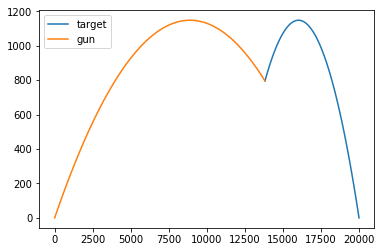

In [32]:
T = np.linspace(0,t*1,100)
g = 9.8
plt.plot(-300*np.cos(np.pi/6)*T+x0,300*np.sin(np.pi/6)*T-0.5*g*T**2+y0,label="target")
plt.plot(600*np.cos(theta)*T, 600*np.sin(theta)*T-0.5*g*T**2,label='gun')
plt.legend()

In [39]:
x0=10000.0
y0=1000.0

def func(p):
    t, theta = p
    return [300*np.sin(np.pi/6)*t+y0 - 600*np.sin(theta)*t,
            -300*np.cos(np.pi/6)*t+x0- 600*np.cos(theta)*t]

res=root(func, [1.0,1.0])
res

    fjac: array([[ 0.09997878,  0.99498957],
       [-0.99498957,  0.09997878]])
     fun: array([1.24236976e-09, 4.05452738e-09])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-3.43462148e-06,  7.03478241e-07])
       r: array([-819.42466648, 2278.16109384, 7030.46805679])
  status: 1
 success: True
       x: array([12.2938478, -5.8873607])

In [40]:
t, theta = res.x
t,theta

(12.293847800225286, -5.887360703949784)

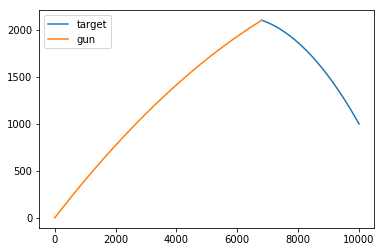

In [41]:
T = np.linspace(0,t*1,100)
g = 9.8
plt.plot(-300*np.cos(np.pi/6)*T+x0,300*np.sin(np.pi/6)*T-0.5*g*T**2+y0,label="target")
plt.plot(600*np.cos(theta)*T, 600*np.sin(theta)*T-0.5*g*T**2,label='gun')
plt.legend()